# Load the Sample Images

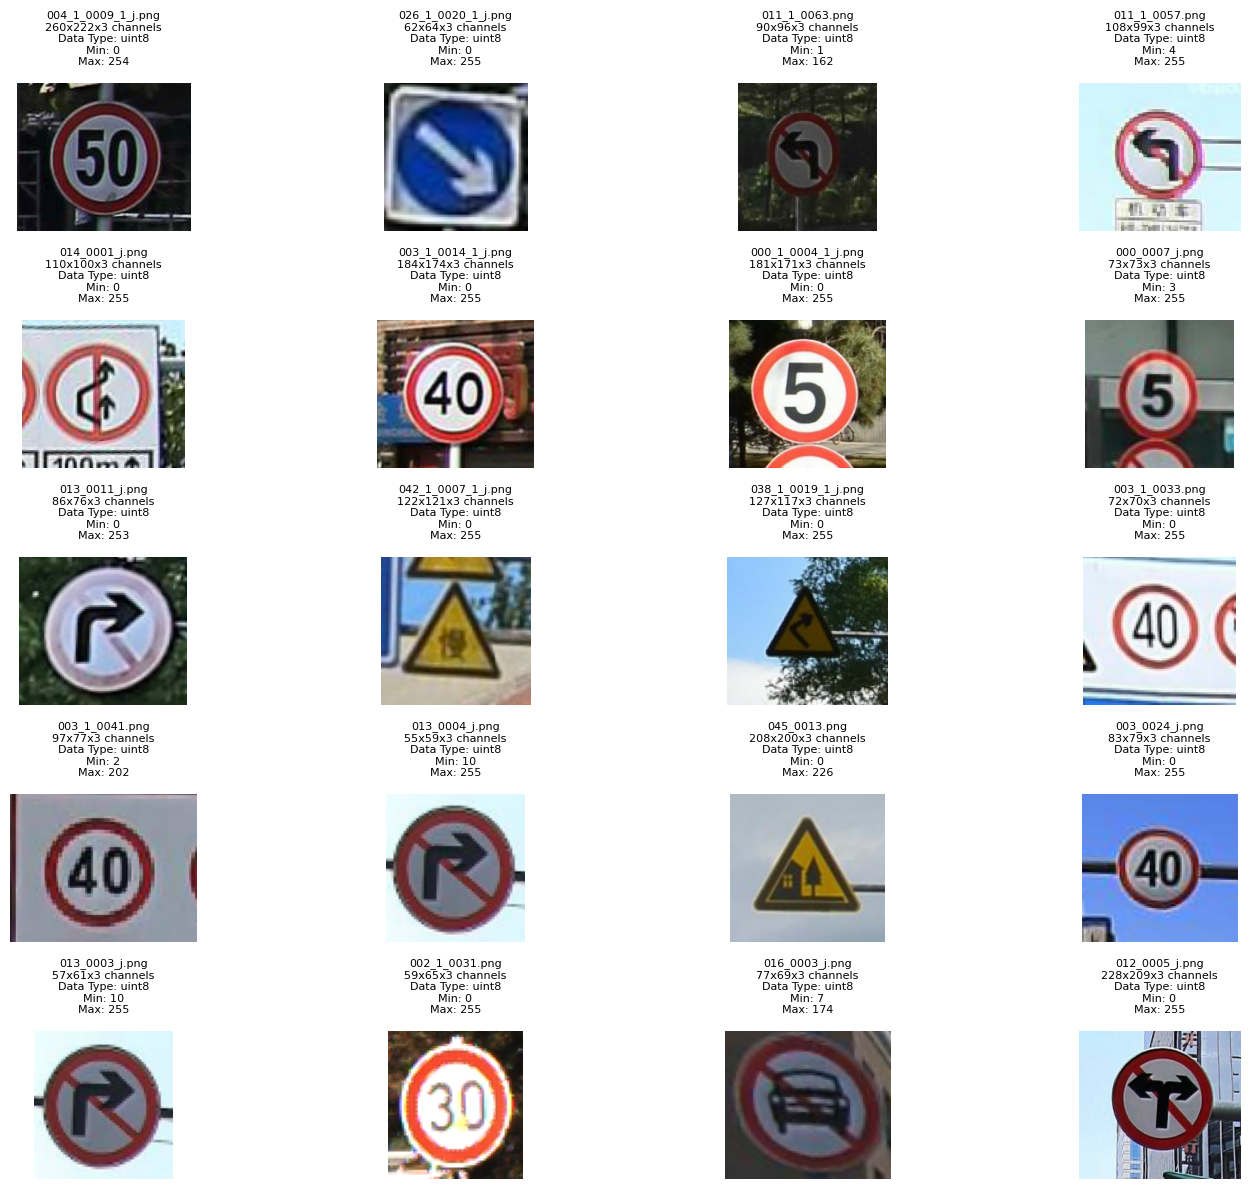

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Directory containing the images
img_dir = "test/"

# Randomly select 20 files from the directory
files = np.random.choice(os.listdir(img_dir), size=20, replace=False)

# Create a figure to display images
plt.figure(figsize=(15, 12))

# Loop through selected files and display each image with additional information
for i, img_file in enumerate(files):
    img_path = os.path.join(img_dir, img_file)
    img = cv.imread(img_path)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load {img_file}")
        continue
    
    # Convert the image from BGR to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # Get image properties
    height, width, channels = img.shape
    data_type = img.dtype
    min_pixel_value = img.min()
    max_pixel_value = img.max()

    
    # Display the image in a subplot
    plt.subplot(5, 4, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes for better visualization
    
    # Add text with image info
    info_text = f"{img_file}\n{width}x{height}x{channels} channels\n" \
                f"Data Type: {data_type}\nMin: {min_pixel_value}\n" \
                f"Max: {max_pixel_value}\n"
    plt.title(info_text, fontsize=8, pad=5)

# Show the plot with images
plt.tight_layout()
plt.show()

## Display Basic Information of ```TsignRecgTest1994Annotation.txt```

In [5]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

# Load the annotation data from the file
annotations = pd.read_csv("TsignRecgTest1994Annotation.txt", sep=";", header=None)

# Display the first few rows of the dataframe
print("Initial Data:")
print(annotations.head())

# Drop the 9th column (index 8) and rename columns
annotations = annotations.iloc[:, :-1]  # Drop last column
annotations.columns = ["filename", "width", "height", "x_start", "y_start", "x_end", "y_end", "label"]

# Display the updated dataframe
print("\nUpdated Data:")
print(annotations.head())

# Set 'filename' as the index
annotations.set_index("filename", inplace=True)

# Display dataframe info
print("\nDataFrame Info:")
print(annotations.info())

# Function to draw bounding box and display annotation details
def display_sample_image_with_details(image_path, annotations):
    img = cv.imread(image_path)
    filename = image_path.split('/')[-1]
    
    if filename in annotations.index:
        row = annotations.loc[filename]
        x_start, y_start, x_end, y_end = int(row['x_start']), int(row['y_start']), int(row['x_end']), int(row['y_end'])
        label = int(row['label'])
        
        # Draw the bounding box
        img_with_bbox = img.copy()
        cv.rectangle(img_with_bbox, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
        
        # Convert BGR to RGB
        img_rgb = cv.cvtColor(img_with_bbox, cv.COLOR_BGR2RGB)
        
        # Plot the image with bounding box and annotation details
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        
        # Image with bounding box
        ax[0].imshow(img_rgb)
        ax[0].set_title(f"Sample Image\nLabel: {label}")
        ax[0].axis('off')
        
        # Annotation details
        details = {
            'Width': row['width'],
            'Height': row['height'],
            'X Start': row['x_start'],
            'Y Start': row['y_start'],
            'X End': row['x_end'],
            'Y End': row['y_end'],
            'Label': row['label']
        }
        
        # Display the details in a table
        table_data = [[key, value] for key, value in details.items()]
        ax[1].axis('tight')
        ax[1].axis('off')
        table = ax[1].table(cellText=table_data, colLabels=['Attribute', 'Value'], cellLoc='left', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.2, 1.2)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Filename {filename} not found in annotations.")

Initial Data:
                0    1    2   3   4    5    6  7   8
0  000_0001_j.png   50   47  14   9   35   35  0 NaN
1  000_0002_j.png   85   89  23  15   64   66  0 NaN
2  000_0003_j.png   93   83  17  17   67   67  0 NaN
3  000_0004_j.png  181  171  27  25  146  140  0 NaN
4  000_0005_j.png  180  167  32  27  151  144  0 NaN

Updated Data:
         filename  width  height  x_start  y_start  x_end  y_end  label
0  000_0001_j.png     50      47       14        9     35     35      0
1  000_0002_j.png     85      89       23       15     64     66      0
2  000_0003_j.png     93      83       17       17     67     67      0
3  000_0004_j.png    181     171       27       25    146    140      0
4  000_0005_j.png    180     167       32       27    151    144      0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 000_0001_j.png to 057_1_0002_1_j.png
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0  

## Data Visualization of ```TsignRecgTest1994Annotation.txt```

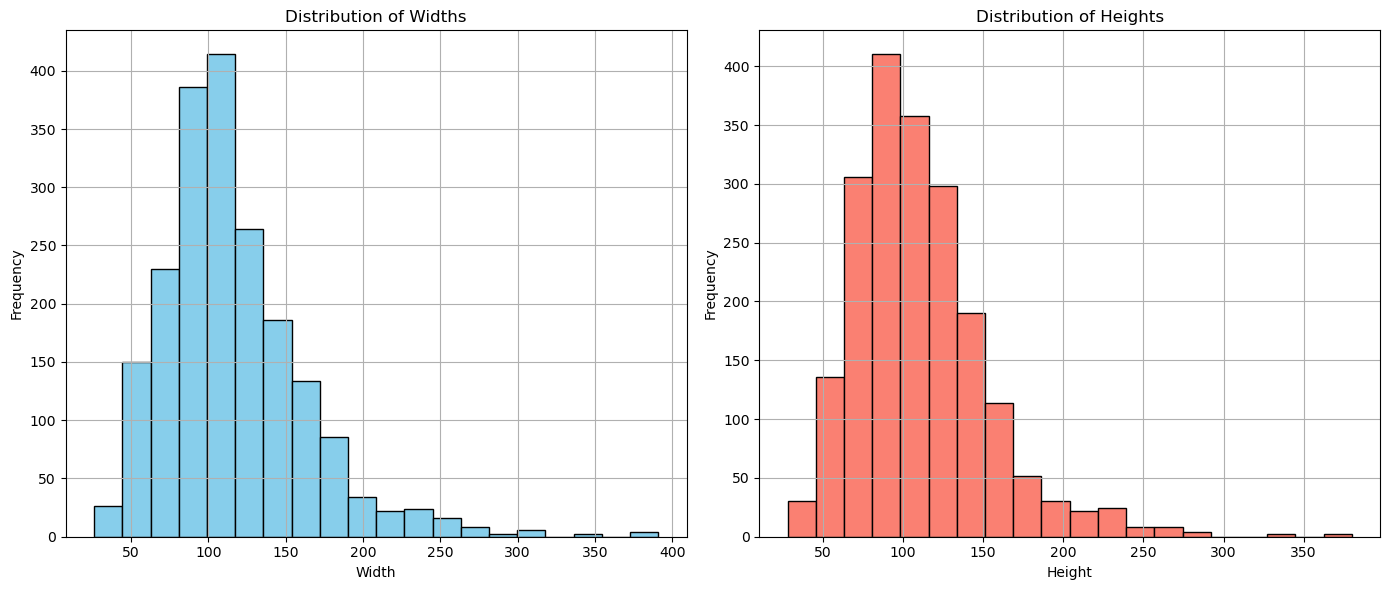

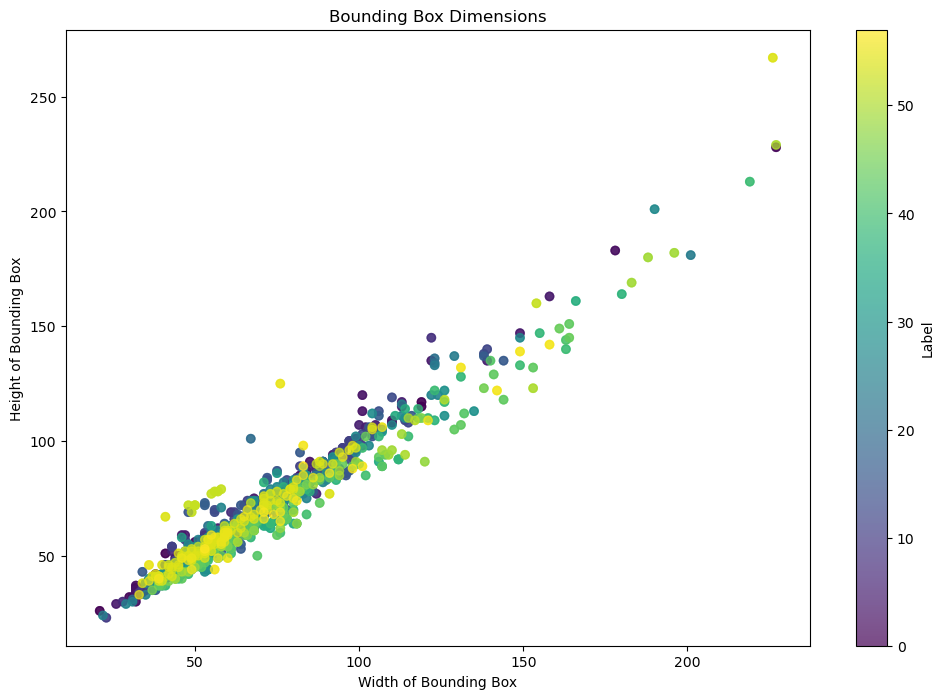

In [6]:
# Plot the distribution of widths and heights
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
annotations['width'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
annotations['height'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the bounding box dimensions
plt.figure(figsize=(12, 8))
plt.scatter(annotations['x_end'] - annotations['x_start'], 
            annotations['y_end'] - annotations['y_start'], 
            c=annotations['label'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Label')
plt.title('Bounding Box Dimensions')
plt.xlabel('Width of Bounding Box')
plt.ylabel('Height of Bounding Box')
plt.show()

# Detection

Done processing image 1...
IoU for 000_0001_j.png: 0.0578
Dice Coefficient for 000_0001_j.png: 0.1093


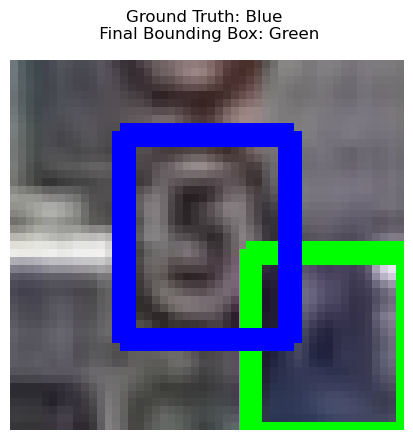

Done processing image 2...
IoU for 000_0004_j.png: 0.9748
Dice Coefficient for 000_0004_j.png: 0.9872


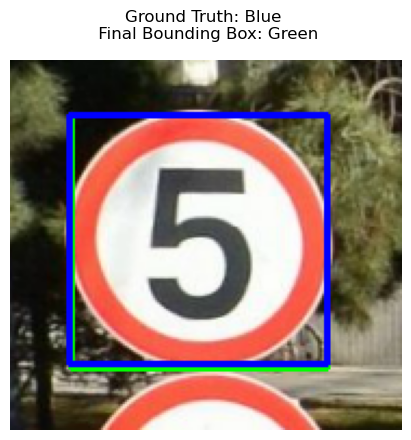

Done processing image 3...
IoU for 000_0005_j.png: 0.9749
Dice Coefficient for 000_0005_j.png: 0.9873


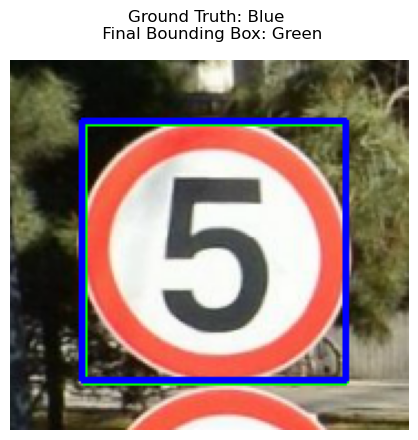

Done processing image 4...
IoU for 000_0007_j.png: 0.6441
Dice Coefficient for 000_0007_j.png: 0.7835


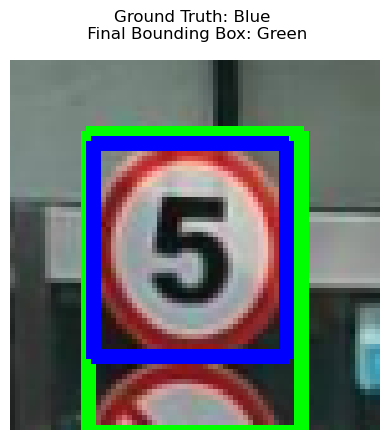

Done processing image 5...
IoU for 000_1_0004_1_j.png: 0.9748
Dice Coefficient for 000_1_0004_1_j.png: 0.9872


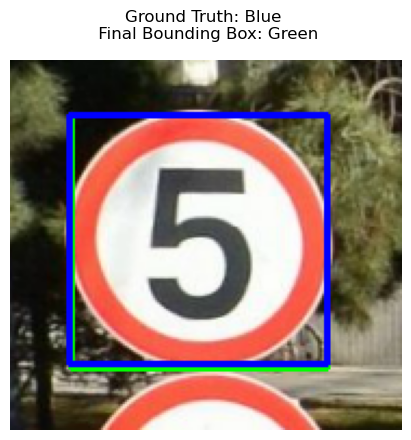

Done processing image 6...
IoU for 000_1_0005_1_j.png: 0.9749
Dice Coefficient for 000_1_0005_1_j.png: 0.9873


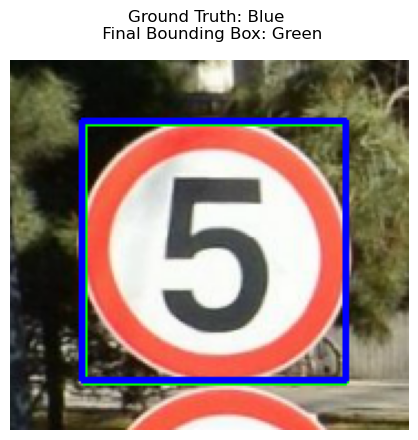

Done processing image 7...
IoU for 001_0002_j.png: 0.7103
Dice Coefficient for 001_0002_j.png: 0.8306


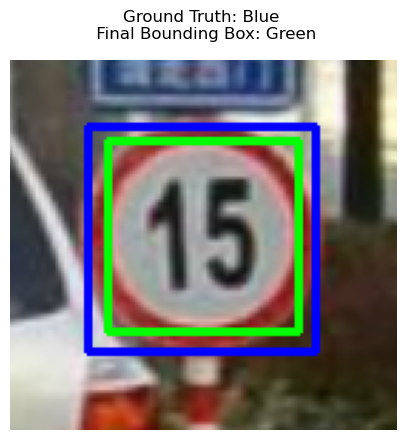

Done processing image 8...
IoU for 001_0006_j.png: 0.7064
Dice Coefficient for 001_0006_j.png: 0.8280


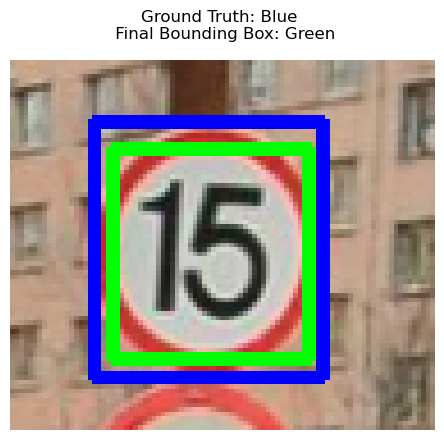

Done processing image 9...
IoU for 001_1_0002_1_j.png: 0.7103
Dice Coefficient for 001_1_0002_1_j.png: 0.8306


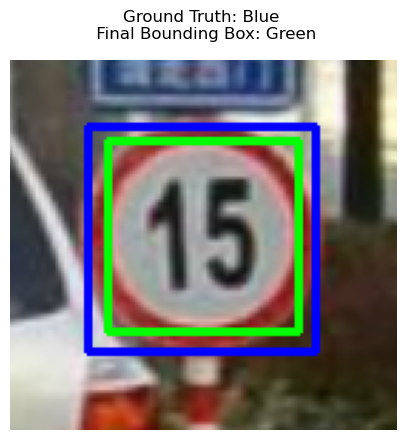

Done processing image 10...
IoU for 001_1_0006_1_j.png: 0.7064
Dice Coefficient for 001_1_0006_1_j.png: 0.8280


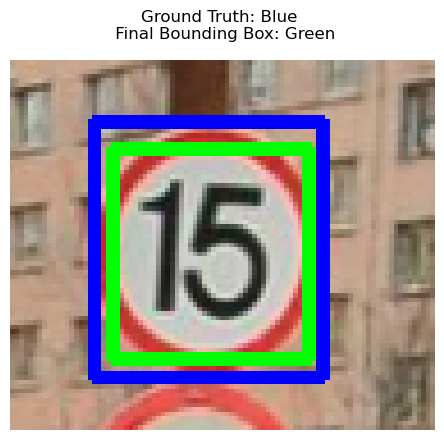

Done processing image 11...
IoU for 002_0018.png: 0.8439
Dice Coefficient for 002_0018.png: 0.9154


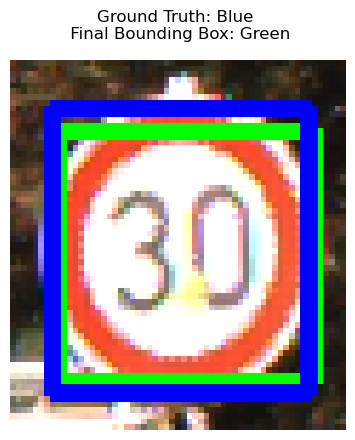

Done processing image 12...
IoU for 002_0031.png: 0.8431
Dice Coefficient for 002_0031.png: 0.9149


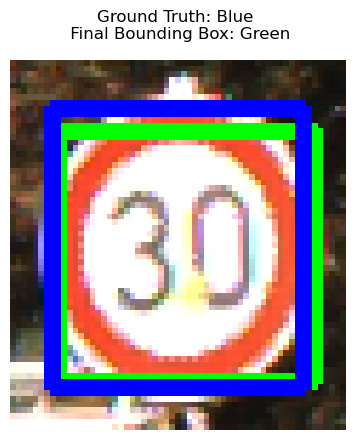

Done processing image 13...
IoU for 002_1_0018.png: 0.8439
Dice Coefficient for 002_1_0018.png: 0.9154


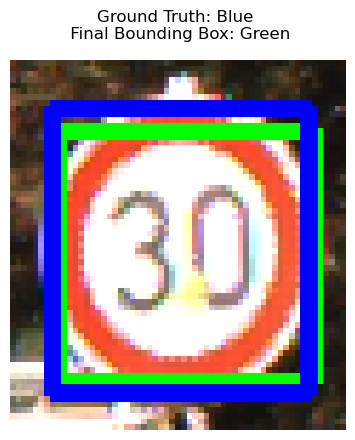

Done processing image 14...
IoU for 002_1_0031.png: 0.8431
Dice Coefficient for 002_1_0031.png: 0.9149


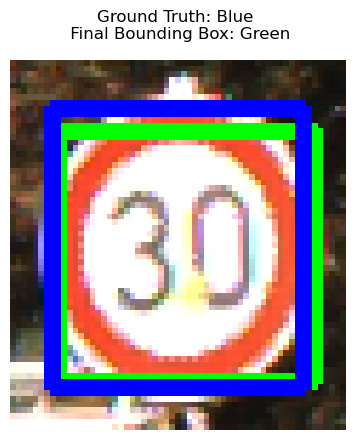

Done processing image 15...
IoU for 003_0009_j.png: 0.7274
Dice Coefficient for 003_0009_j.png: 0.8422


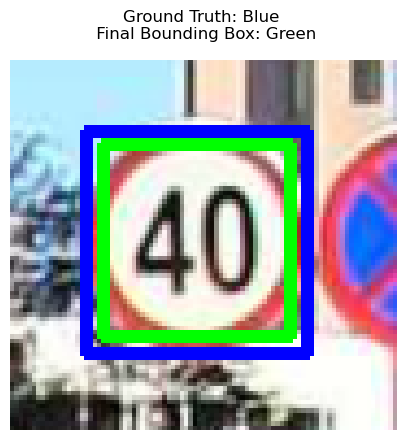

Done processing image 16...
IoU for 003_0010_j.png: 0.7460
Dice Coefficient for 003_0010_j.png: 0.8545


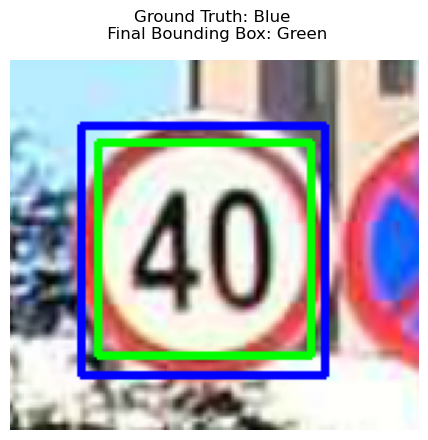

Done processing image 17...
IoU for 003_0014_j.png: 0.9558
Dice Coefficient for 003_0014_j.png: 0.9774


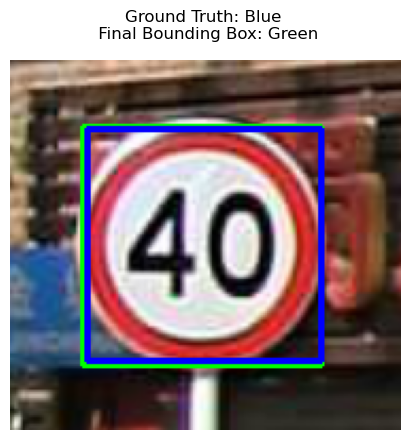

Done processing image 18...
IoU for 003_0016_j.png: 0.9800
Dice Coefficient for 003_0016_j.png: 0.9899


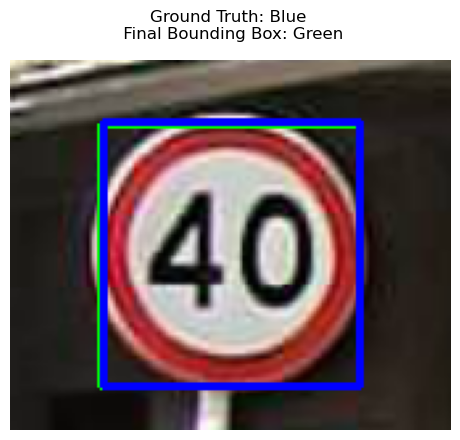

Done processing image 19...
IoU for 003_0023_j.png: 0.9196
Dice Coefficient for 003_0023_j.png: 0.9581


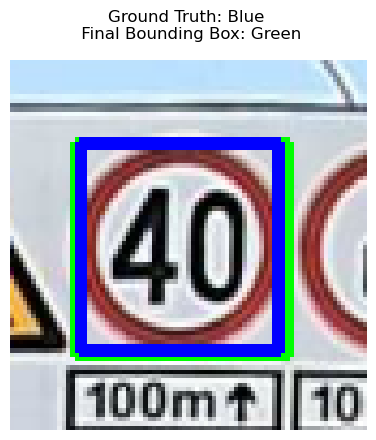

Done processing image 20...
IoU for 003_0024_j.png: 0.6911
Dice Coefficient for 003_0024_j.png: 0.8173


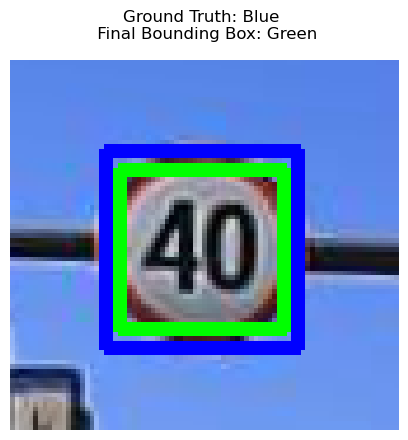

Done processing image 21...
IoU for 003_0028_j.png: 0.6689
Dice Coefficient for 003_0028_j.png: 0.8016


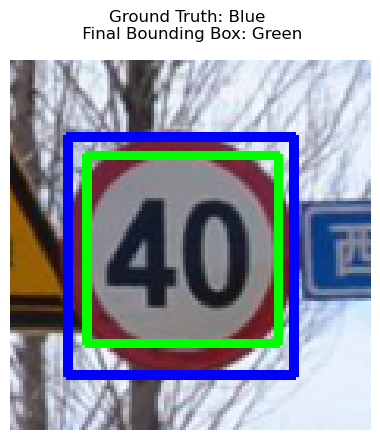

Done processing image 22...
IoU for 003_0029_j.png: 0.7232
Dice Coefficient for 003_0029_j.png: 0.8394


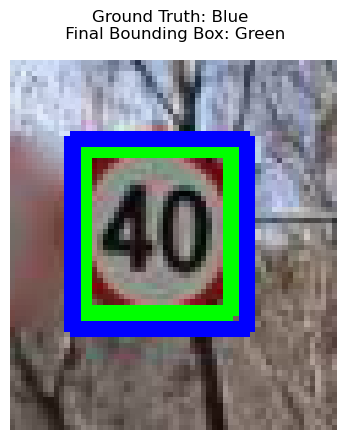

Done processing image 23...
IoU for 003_0030.png: 0.7160
Dice Coefficient for 003_0030.png: 0.8345


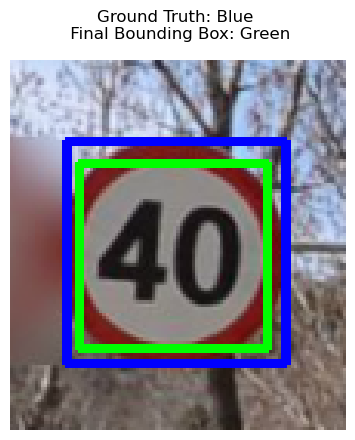

Done processing image 24...
IoU for 003_0031.png: 0.9292
Dice Coefficient for 003_0031.png: 0.9633


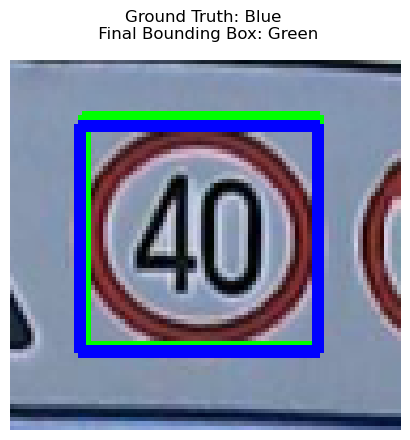

Done processing image 25...
IoU for 003_0032.png: 0.9467
Dice Coefficient for 003_0032.png: 0.9726


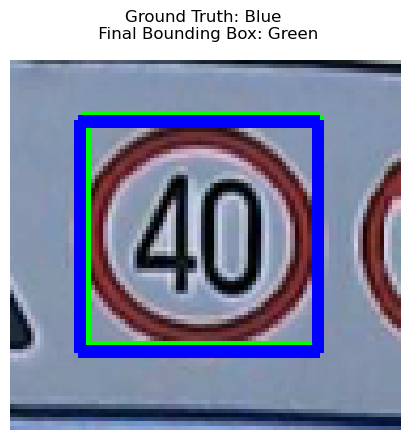

Done processing image 26...
IoU for 003_0033.png: 0.8647
Dice Coefficient for 003_0033.png: 0.9274


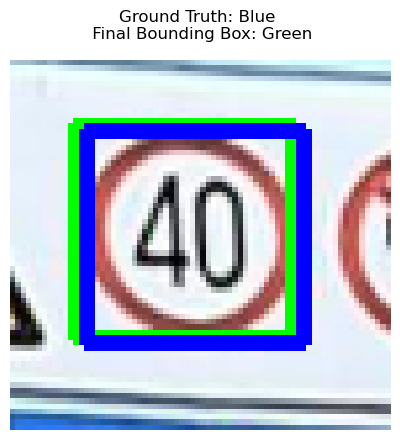

Done processing image 27...
IoU for 003_0034.png: 0.8647
Dice Coefficient for 003_0034.png: 0.9274


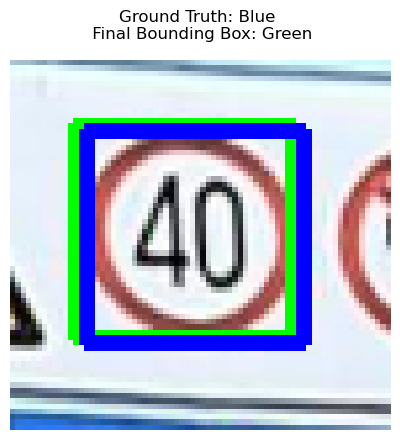

Done processing image 28...
IoU for 003_0037.png: 0.9375
Dice Coefficient for 003_0037.png: 0.9677


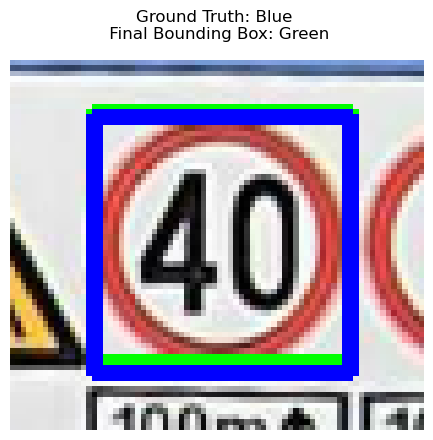

Done processing image 29...
IoU for 003_0038.png: 0.9375
Dice Coefficient for 003_0038.png: 0.9677


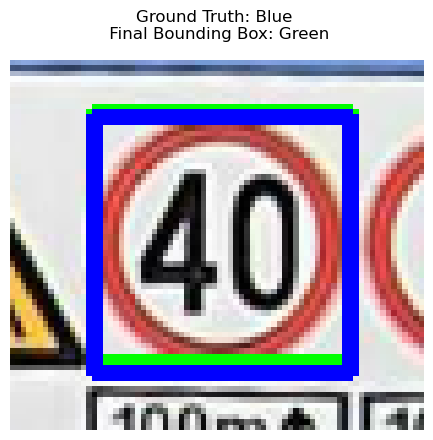

Done processing image 30...
IoU for 003_0041.png: 0.8845
Dice Coefficient for 003_0041.png: 0.9387


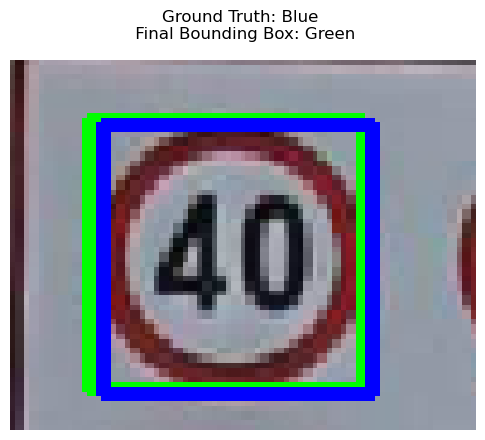

Done processing image 31...
IoU for 003_1_0009_1_j.png: 0.7274
Dice Coefficient for 003_1_0009_1_j.png: 0.8422


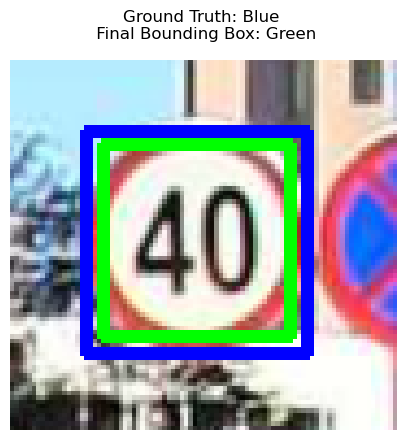

Done processing image 32...
IoU for 003_1_0010_1_j.png: 0.7460
Dice Coefficient for 003_1_0010_1_j.png: 0.8545


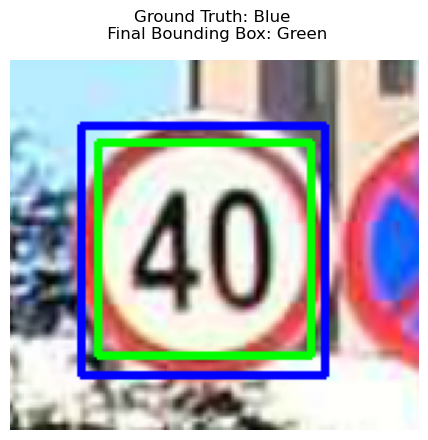

Done processing image 33...
IoU for 003_1_0014_1_j.png: 0.9558
Dice Coefficient for 003_1_0014_1_j.png: 0.9774


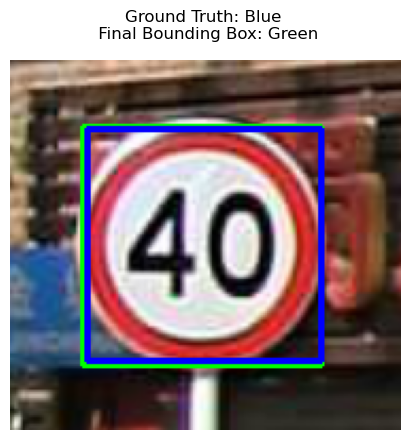

Done processing image 34...
IoU for 003_1_0016_1_j.png: 0.9800
Dice Coefficient for 003_1_0016_1_j.png: 0.9899


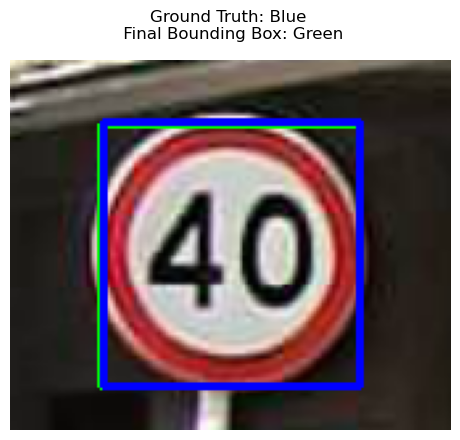

Done processing image 35...
IoU for 003_1_0023_1_j.png: 0.9196
Dice Coefficient for 003_1_0023_1_j.png: 0.9581


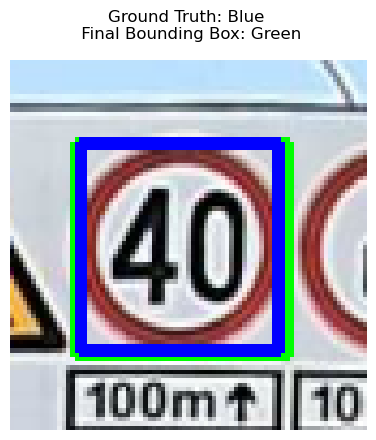

Done processing image 36...
IoU for 003_1_0024_1_j.png: 0.6911
Dice Coefficient for 003_1_0024_1_j.png: 0.8173


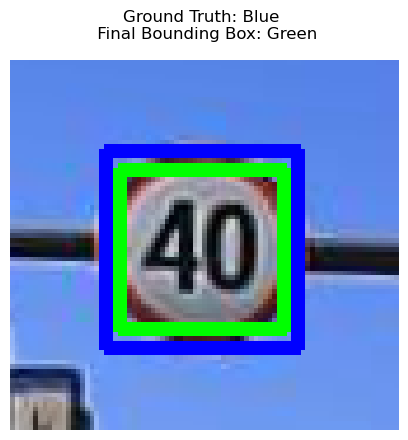

Done processing image 37...
IoU for 003_1_0028_1_j.png: 0.6689
Dice Coefficient for 003_1_0028_1_j.png: 0.8016


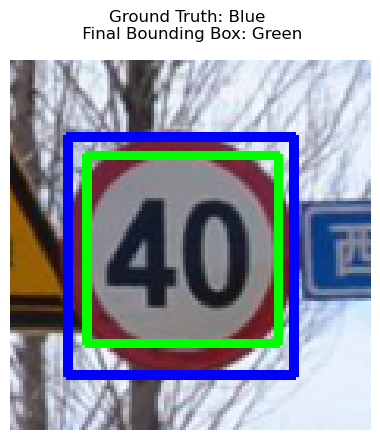

Done processing image 38...
IoU for 003_1_0029_1_j.png: 0.7232
Dice Coefficient for 003_1_0029_1_j.png: 0.8394


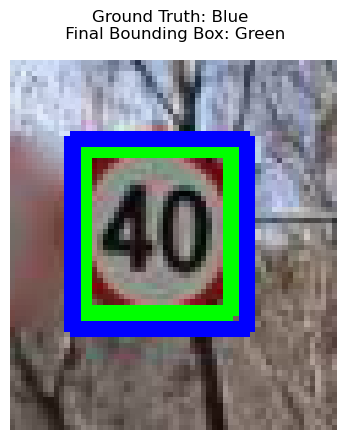

Done processing image 39...
IoU for 003_1_0030.png: 0.7160
Dice Coefficient for 003_1_0030.png: 0.8345


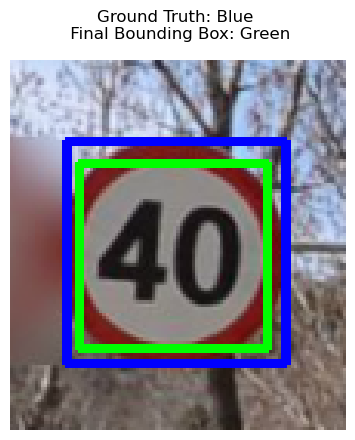

Done processing image 40...
IoU for 003_1_0031.png: 0.9292
Dice Coefficient for 003_1_0031.png: 0.9633


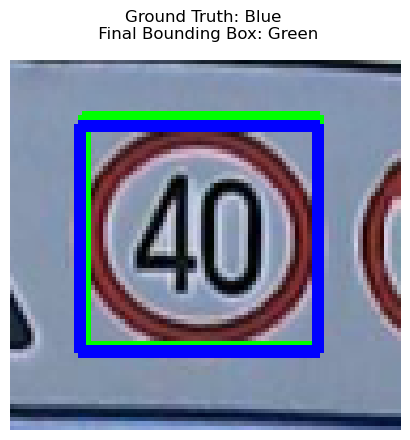

Done processing image 41...
IoU for 003_1_0032.png: 0.9467
Dice Coefficient for 003_1_0032.png: 0.9726


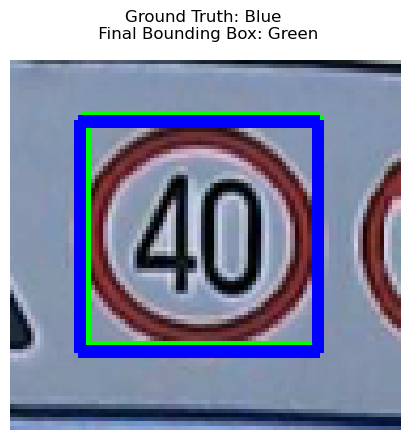

Done processing image 42...
IoU for 003_1_0033.png: 0.8647
Dice Coefficient for 003_1_0033.png: 0.9274


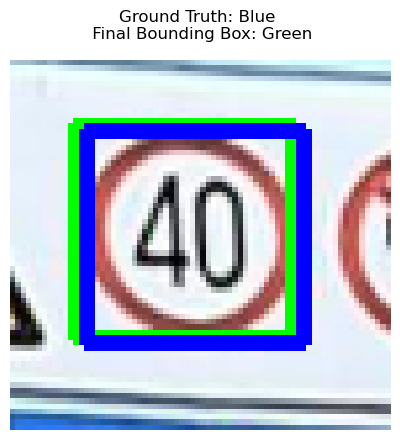

Done processing image 43...
IoU for 003_1_0034.png: 0.8647
Dice Coefficient for 003_1_0034.png: 0.9274


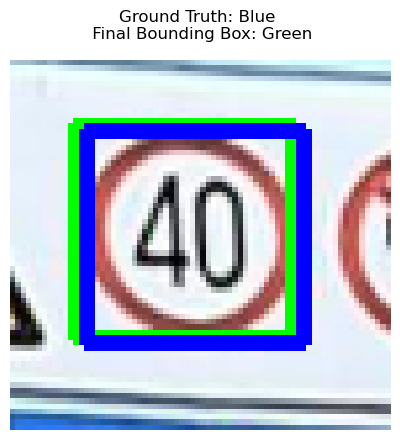

Done processing image 44...
IoU for 003_1_0037.png: 0.9375
Dice Coefficient for 003_1_0037.png: 0.9677


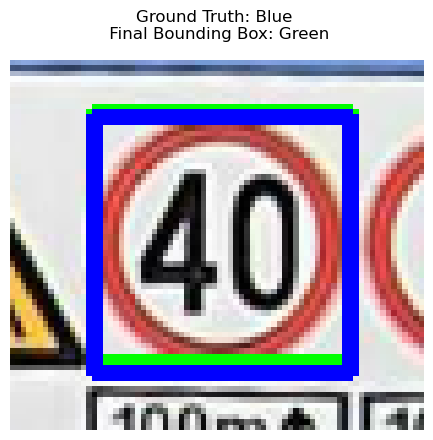

Done processing image 45...
IoU for 003_1_0038.png: 0.9375
Dice Coefficient for 003_1_0038.png: 0.9677


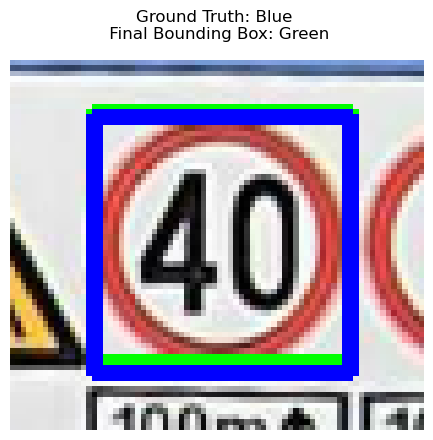

Done processing image 46...
IoU for 003_1_0041.png: 0.8845
Dice Coefficient for 003_1_0041.png: 0.9387


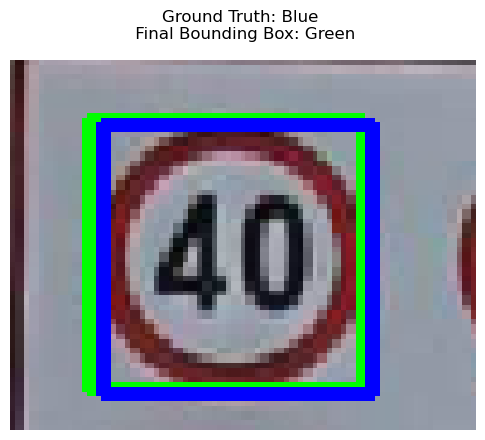

Done processing image 47...
IoU for 004_0003_j.png: 0.6699
Dice Coefficient for 004_0003_j.png: 0.8023


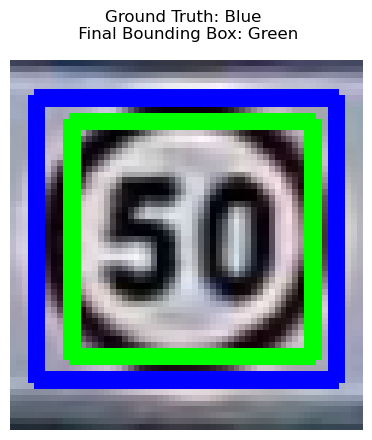

Done processing image 48...
IoU for 004_0004_j.png: 0.9583
Dice Coefficient for 004_0004_j.png: 0.9787


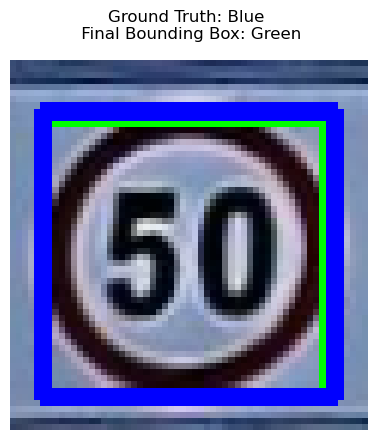

Done processing image 49...
IoU for 004_0009_j.png: 0.8955
Dice Coefficient for 004_0009_j.png: 0.9449


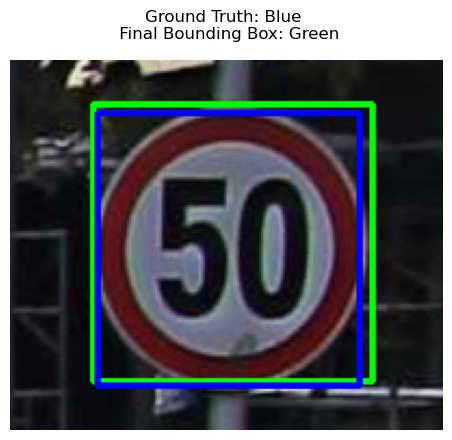

Done processing image 50...
IoU for 004_0017_j.png: 0.7958
Dice Coefficient for 004_0017_j.png: 0.8863


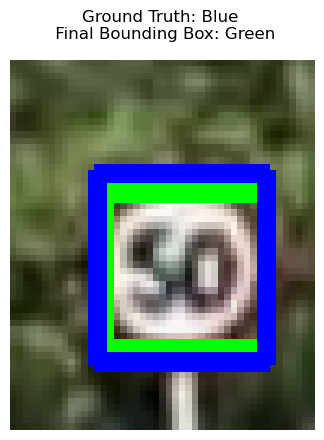

Done processing image 51...
IoU for 004_0018_j.png: 0.7049
Dice Coefficient for 004_0018_j.png: 0.8269


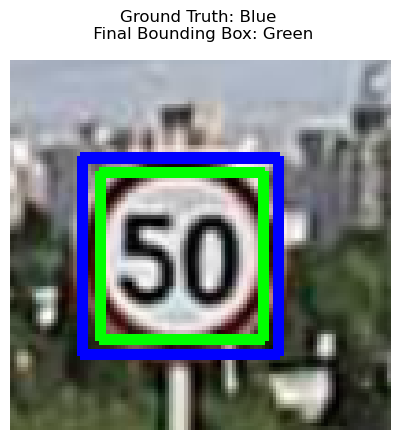

Done processing image 52...
IoU for 004_0019_j.png: 0.7088
Dice Coefficient for 004_0019_j.png: 0.8296


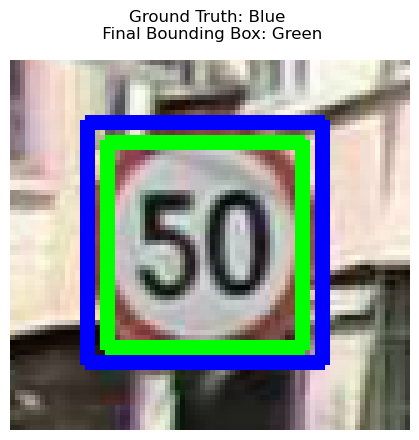

Done processing image 53...
IoU for 004_0021_j.png: 0.6196
Dice Coefficient for 004_0021_j.png: 0.7651


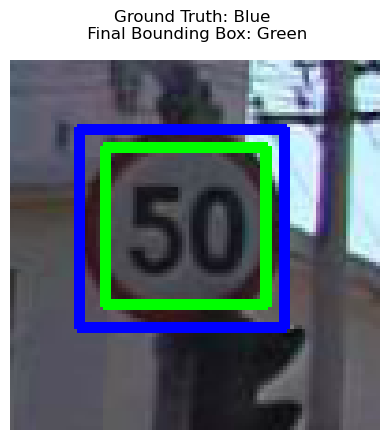

Done processing image 54...
IoU for 004_0022_j.png: 0.6963
Dice Coefficient for 004_0022_j.png: 0.8210


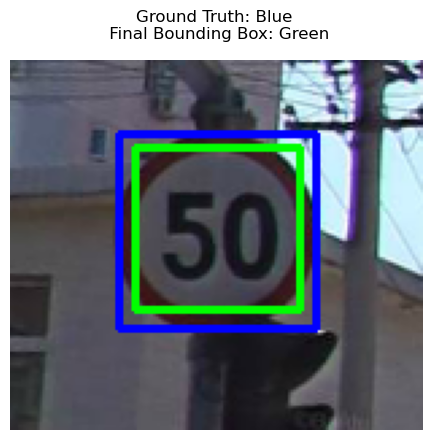

Done processing image 55...
IoU for 004_0023_j.png: 0.9630
Dice Coefficient for 004_0023_j.png: 0.9811


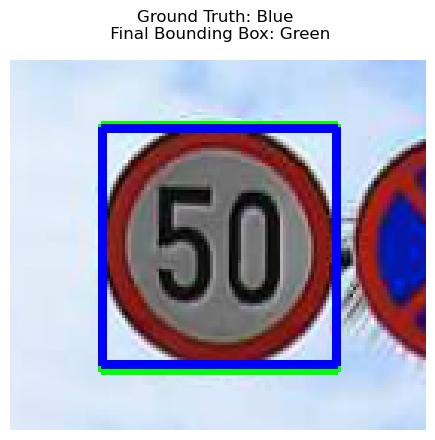

Done processing image 56...
IoU for 004_0024_j.png: 0.9719
Dice Coefficient for 004_0024_j.png: 0.9857


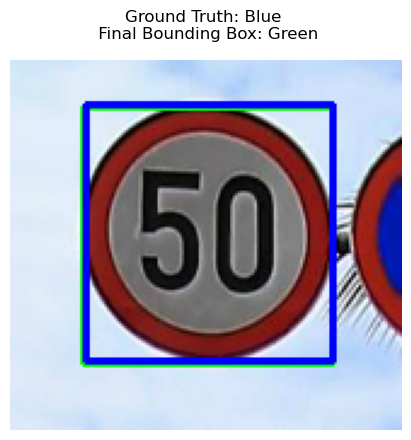

Done processing image 57...
IoU for 004_1_0003_1_j.png: 0.6699
Dice Coefficient for 004_1_0003_1_j.png: 0.8023


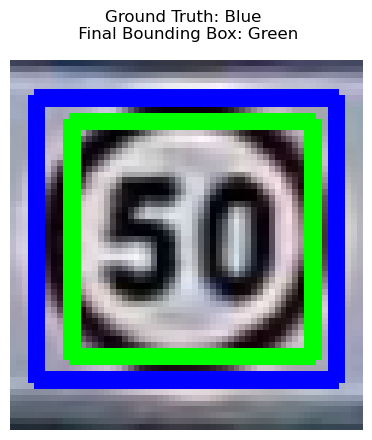

Done processing image 58...
IoU for 004_1_0004_1_j.png: 0.9583
Dice Coefficient for 004_1_0004_1_j.png: 0.9787


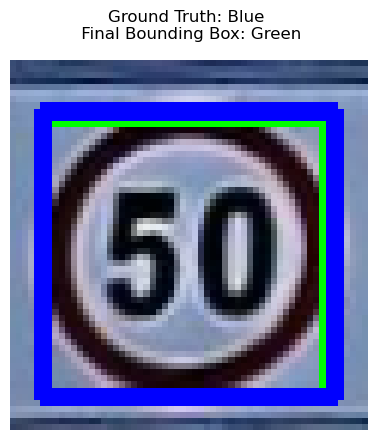

Done processing image 59...
IoU for 004_1_0009_1_j.png: 0.8955
Dice Coefficient for 004_1_0009_1_j.png: 0.9449


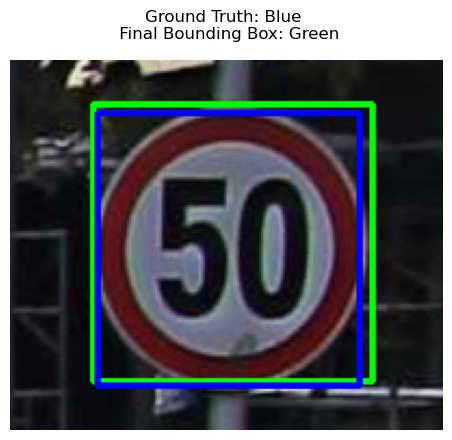

Done processing image 60...
IoU for 011_1_0054_1_j.png: 0.9691
Dice Coefficient for 011_1_0054_1_j.png: 0.9843


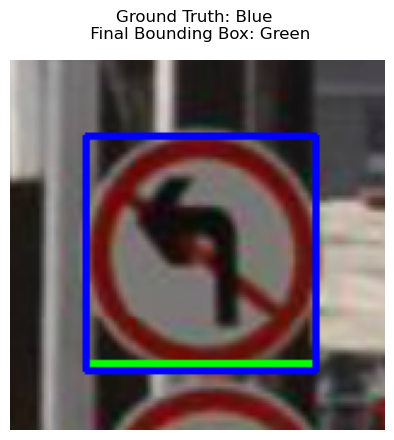

Done processing image 61...
IoU for 011_1_0056.png: 1.0000
Dice Coefficient for 011_1_0056.png: 1.0000


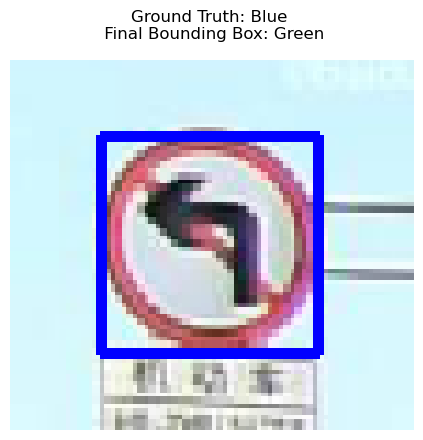

Done processing image 62...
IoU for 011_1_0057.png: 0.9664
Dice Coefficient for 011_1_0057.png: 0.9829


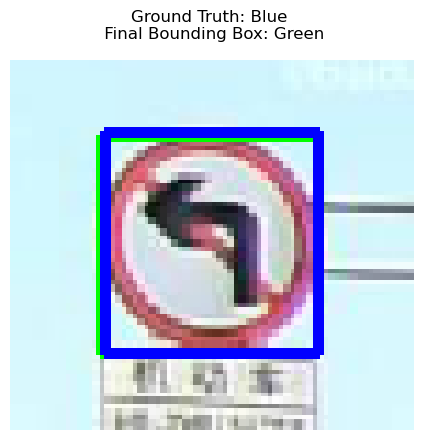

Done processing image 63...
IoU for 011_1_0058.png: 0.8897
Dice Coefficient for 011_1_0058.png: 0.9416


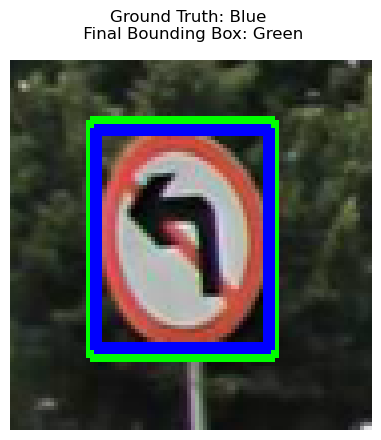

Done processing image 64...
IoU for 011_1_0059.png: 0.8897
Dice Coefficient for 011_1_0059.png: 0.9416


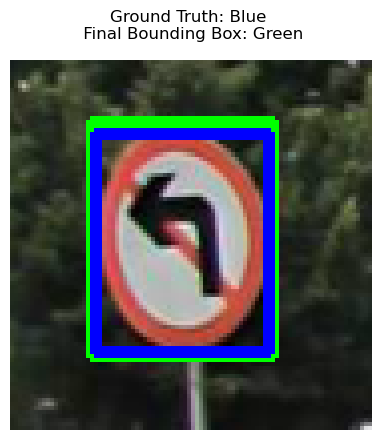

Done processing image 65...
IoU for 011_1_0060.png: 0.6563
Dice Coefficient for 011_1_0060.png: 0.7925


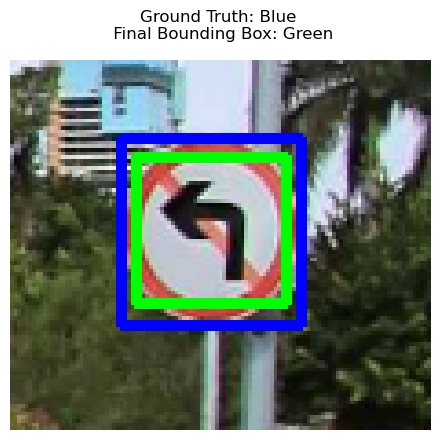

Done processing image 66...
IoU for 011_1_0061.png: 0.6973
Dice Coefficient for 011_1_0061.png: 0.8216


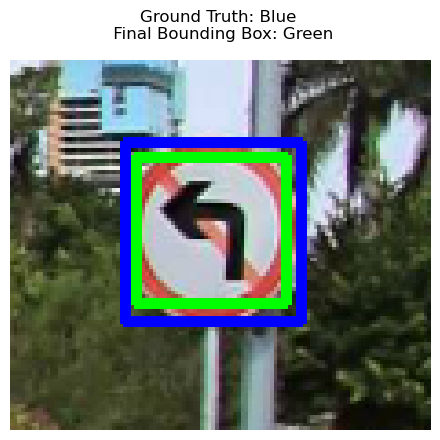

Done processing image 67...
IoU for 011_1_0062.png: 0.8832
Dice Coefficient for 011_1_0062.png: 0.9380


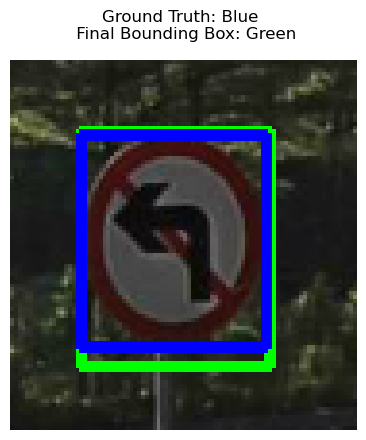

Done processing image 68...
IoU for 011_1_0063.png: 0.8963
Dice Coefficient for 011_1_0063.png: 0.9453


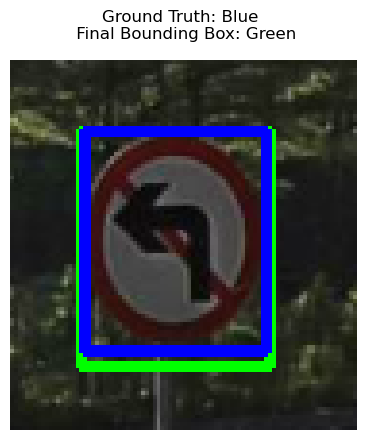

Done processing image 69...
IoU for 012_0005_j.png: 0.9681
Dice Coefficient for 012_0005_j.png: 0.9838


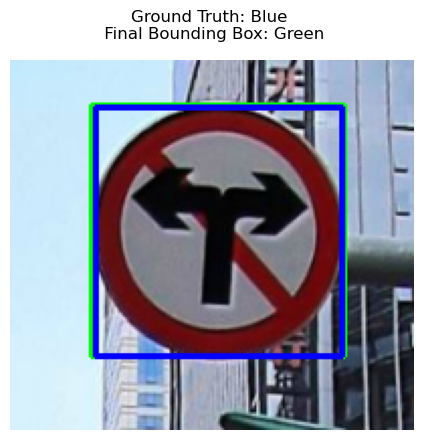

Done processing image 70...
IoU for 012_0006_j.png: 0.6423
Dice Coefficient for 012_0006_j.png: 0.7822


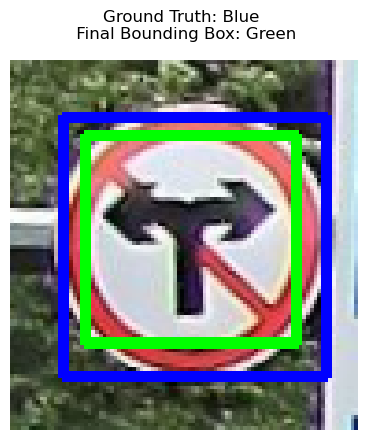

Done processing image 71...
IoU for 012_0007_j.png: 0.6423
Dice Coefficient for 012_0007_j.png: 0.7822


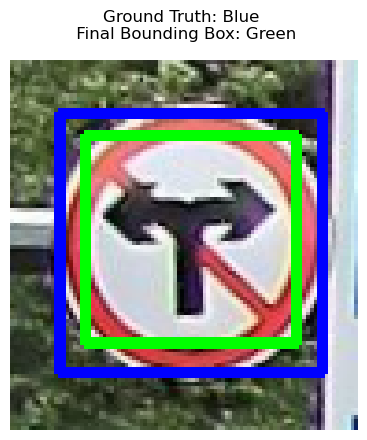

Done processing image 72...
IoU for 012_0008_j.png: 0.6249
Dice Coefficient for 012_0008_j.png: 0.7692


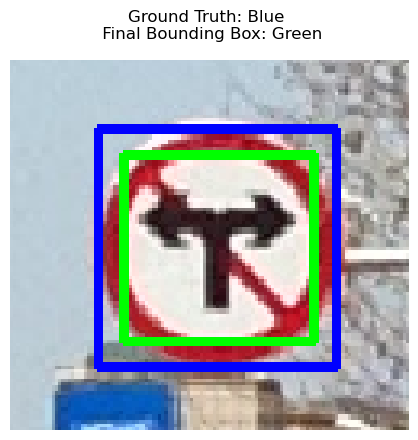

Done processing image 73...
IoU for 012_0009_j.png: 0.6609
Dice Coefficient for 012_0009_j.png: 0.7958


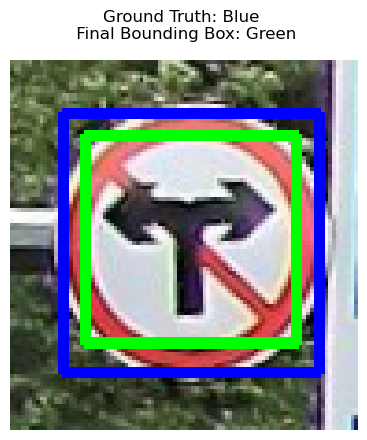

Done processing image 74...
IoU for 012_0011_j.png: 0.9532
Dice Coefficient for 012_0011_j.png: 0.9760


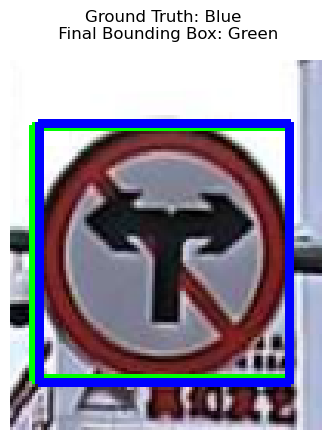

Done processing image 75...
IoU for 013_0003_j.png: 0.5663
Dice Coefficient for 013_0003_j.png: 0.7231


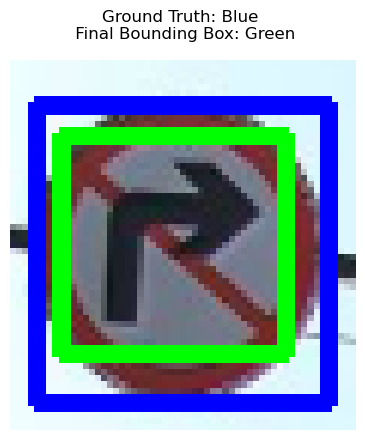

Done processing image 76...
IoU for 013_0004_j.png: 0.9796
Dice Coefficient for 013_0004_j.png: 0.9897


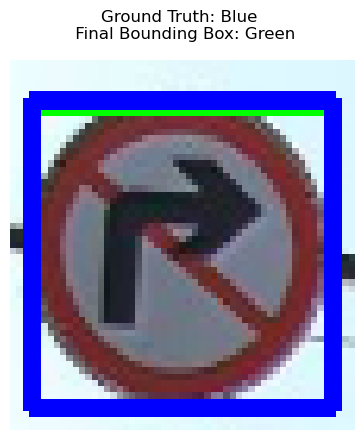

Done processing image 77...
IoU for 013_0005_j.png: 0.9528
Dice Coefficient for 013_0005_j.png: 0.9758


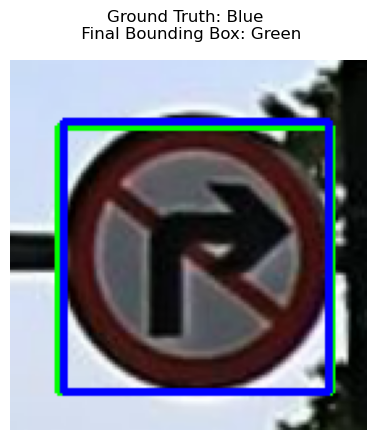

Done processing image 78...
IoU for 013_0007_j.png: 0.5550
Dice Coefficient for 013_0007_j.png: 0.7138


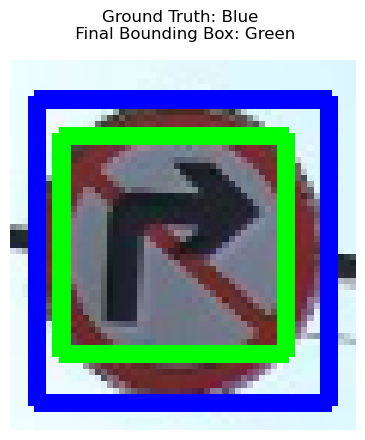

Done processing image 79...
IoU for 013_0008_j.png: 0.9806
Dice Coefficient for 013_0008_j.png: 0.9902


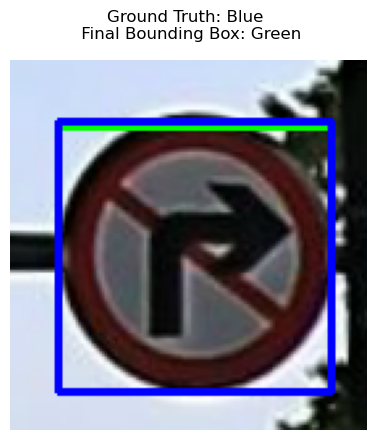

Done processing image 80...
IoU for 013_0009_j.png: 0.8232
Dice Coefficient for 013_0009_j.png: 0.9030


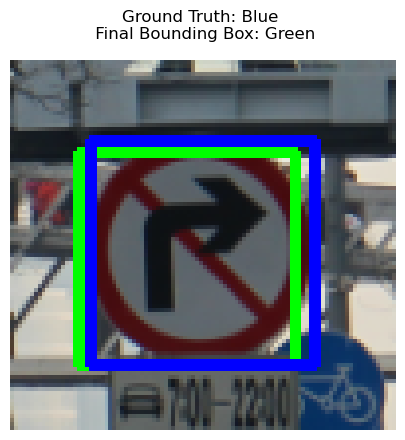

Done processing image 81...
IoU for 013_0011_j.png: 0.9104
Dice Coefficient for 013_0011_j.png: 0.9531


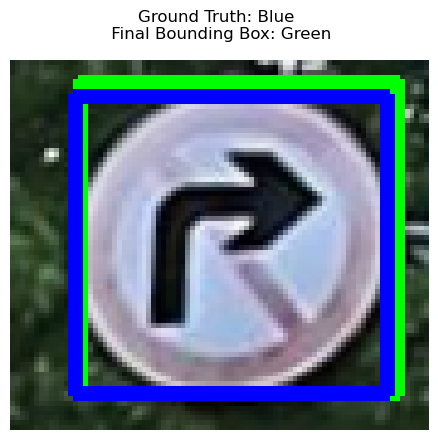

Done processing image 82...
IoU for 013_0012_j.png: 0.8012
Dice Coefficient for 013_0012_j.png: 0.8897


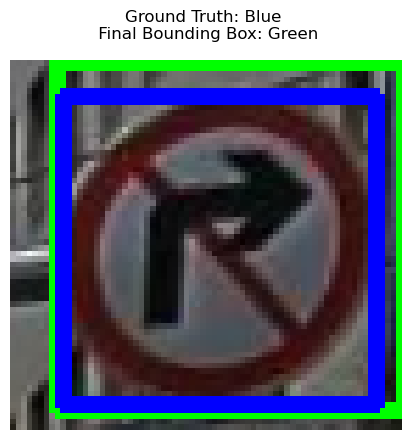

Done processing image 83...
IoU for 014_0001_j.png: 0.8900
Dice Coefficient for 014_0001_j.png: 0.9418


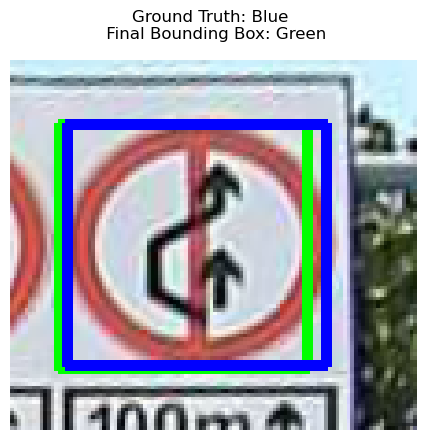

Done processing image 84...
IoU for 014_0002_j.png: 0.8780
Dice Coefficient for 014_0002_j.png: 0.9350


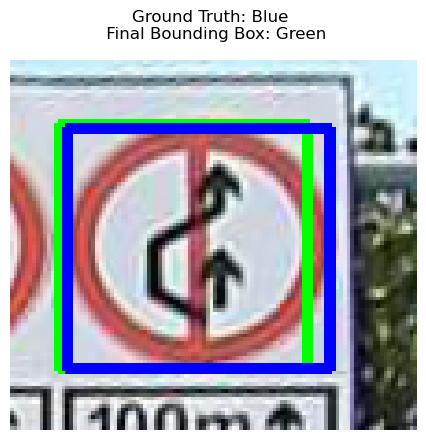

Done processing image 85...
IoU for 014_0003_j.png: 0.9216
Dice Coefficient for 014_0003_j.png: 0.9592


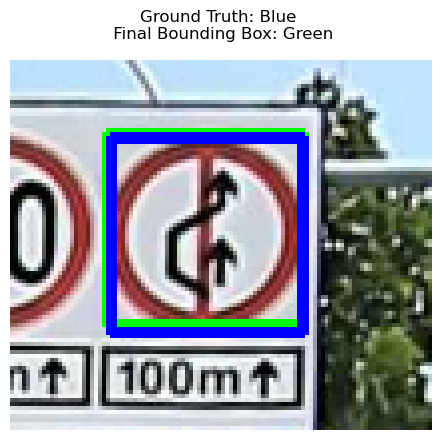

Done processing image 86...
IoU for 014_0004_j.png: 0.9234
Dice Coefficient for 014_0004_j.png: 0.9602


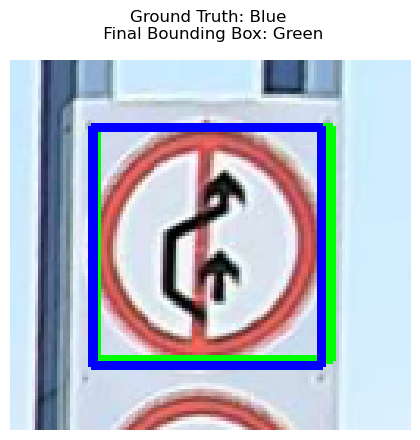

Done processing image 87...
IoU for 015_0001_j.png: 0.8866
Dice Coefficient for 015_0001_j.png: 0.9399


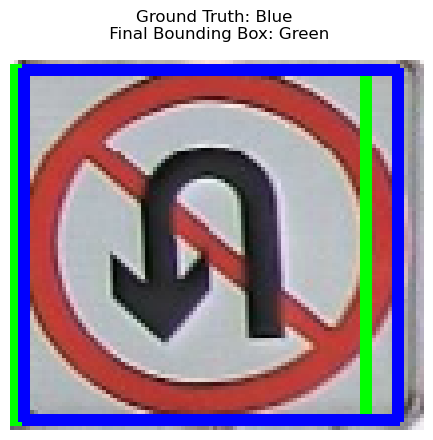

Done processing image 88...
IoU for 015_0002_j.png: 0.8509
Dice Coefficient for 015_0002_j.png: 0.9194


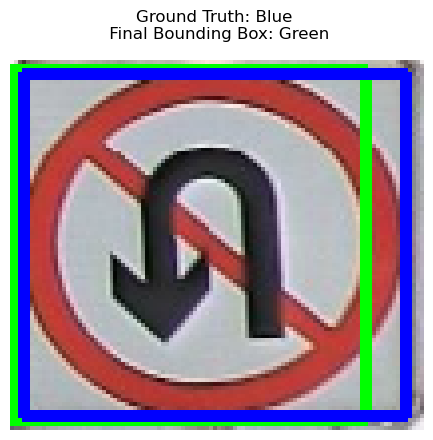

Done processing image 89...
IoU for 015_0003_j.png: 0.8420
Dice Coefficient for 015_0003_j.png: 0.9142


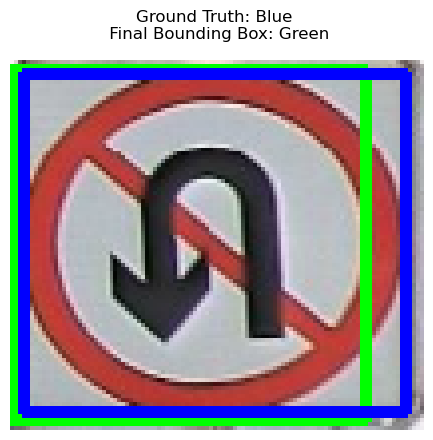

Done processing image 90...
IoU for 015_0004_j.png: 0.9429
Dice Coefficient for 015_0004_j.png: 0.9706


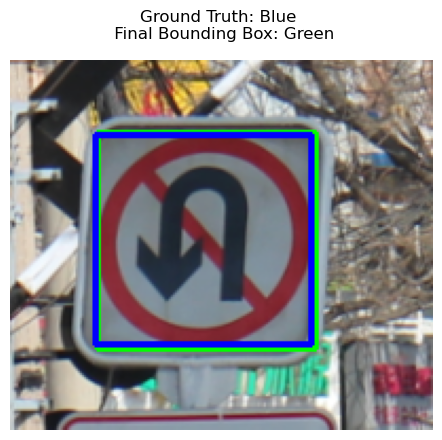

Done processing image 91...
IoU for 016_0002_j.png: 0.8907
Dice Coefficient for 016_0002_j.png: 0.9422


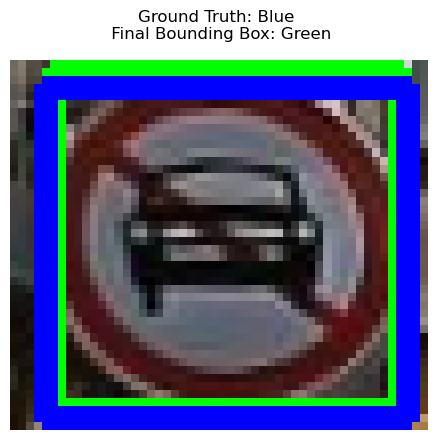

Done processing image 92...
IoU for 016_0003_j.png: 0.8117
Dice Coefficient for 016_0003_j.png: 0.8960


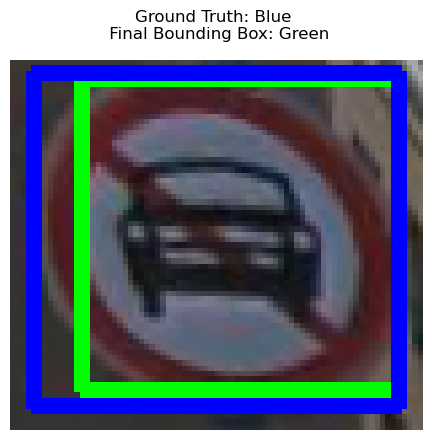

Done processing image 93...
IoU for 016_0004_j.png: 0.6443
Dice Coefficient for 016_0004_j.png: 0.7837


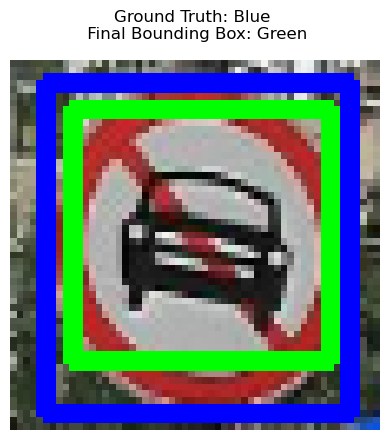

Done processing image 94...
IoU for 026_1_0018_1_j.png: 0.9018
Dice Coefficient for 026_1_0018_1_j.png: 0.9484


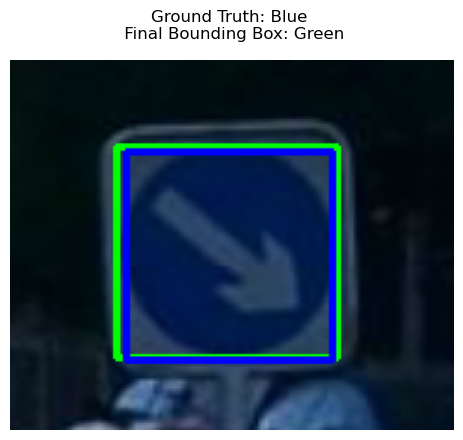

Done processing image 95...
IoU for 026_1_0019_1_j.png: 0.7937
Dice Coefficient for 026_1_0019_1_j.png: 0.8850


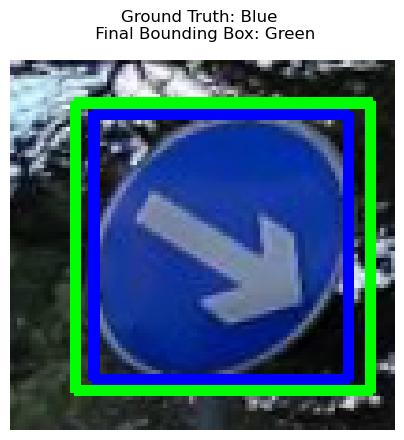

Done processing image 96...
IoU for 026_1_0020_1_j.png: 0.9057
Dice Coefficient for 026_1_0020_1_j.png: 0.9505


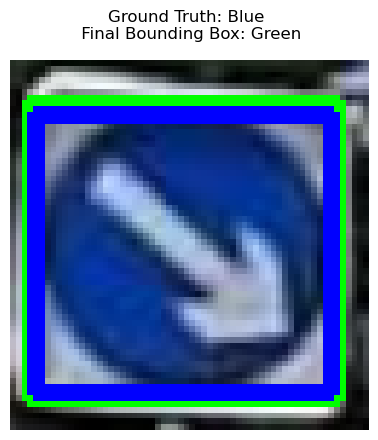

Done processing image 97...
IoU for 028_1_0018_1_j.png: 0.3268
Dice Coefficient for 028_1_0018_1_j.png: 0.4926


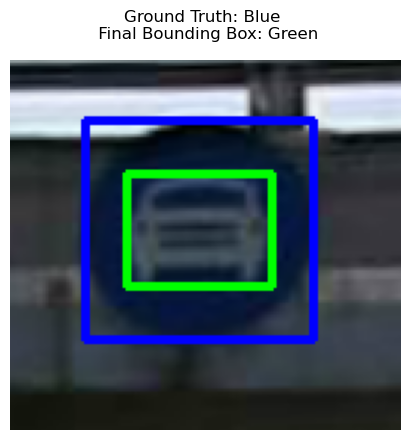

Done processing image 98...
Error: Missing keys in boxA or boxB.
Error: Missing keys in boxA or boxB.
IoU for 038_1_0019_1_j.png: 0.0000
Dice Coefficient for 038_1_0019_1_j.png: 0.0000


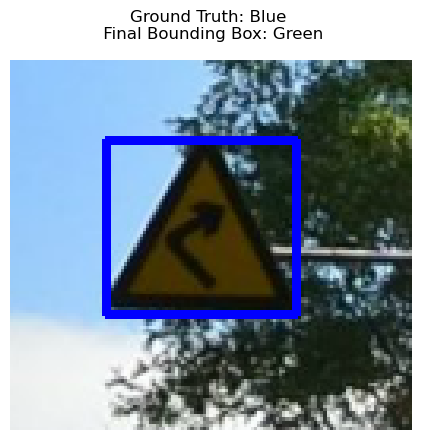

Done processing image 99...
IoU for 042_1_0007_1_j.png: 0.4821
Dice Coefficient for 042_1_0007_1_j.png: 0.6506


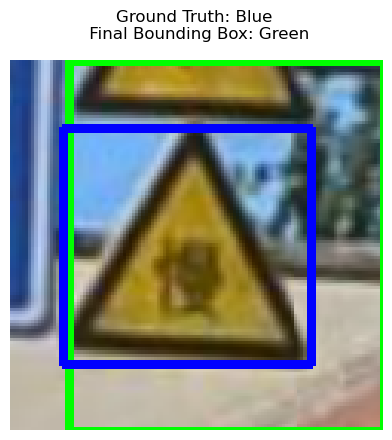

Done processing image 100...
IoU for 043_0026_j.png: 0.7423
Dice Coefficient for 043_0026_j.png: 0.8521


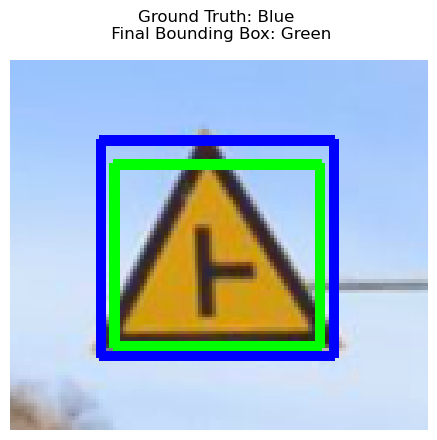

Done processing image 101...
IoU for 043_0027_j.png: 0.7837
Dice Coefficient for 043_0027_j.png: 0.8787


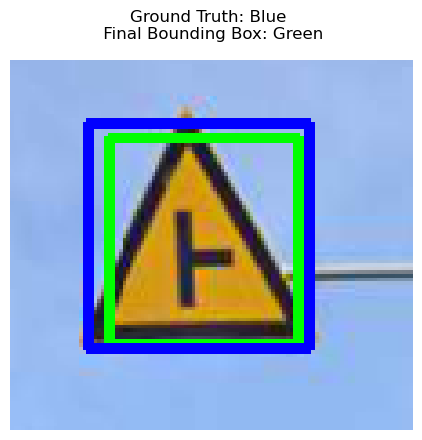

Done processing image 102...
IoU for 043_0029_j.png: 0.7290
Dice Coefficient for 043_0029_j.png: 0.8433


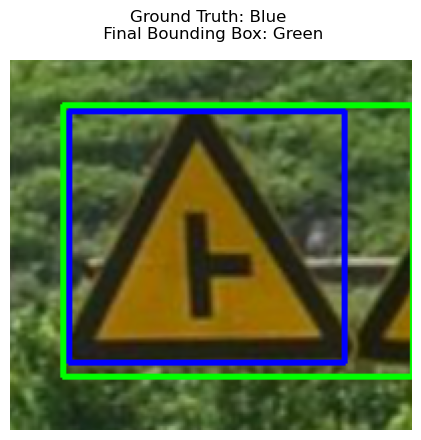

Done processing image 103...
IoU for 045_0013.png: 0.9398
Dice Coefficient for 045_0013.png: 0.9690


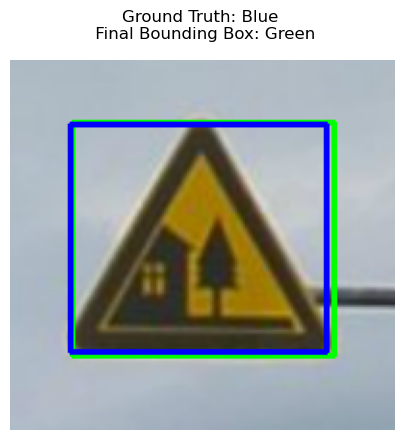

Done processing image 104...
IoU for 047_0003_j.png: 0.8636
Dice Coefficient for 047_0003_j.png: 0.9268


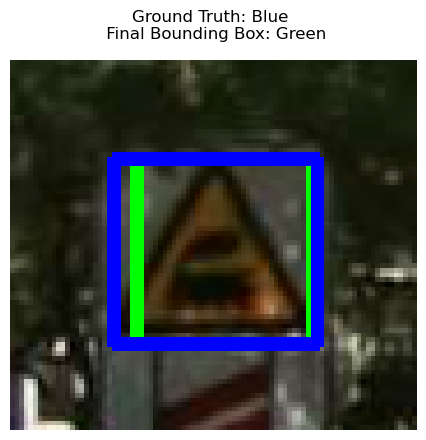

Done processing image 105...
IoU for 047_0004_j.png: 0.7542
Dice Coefficient for 047_0004_j.png: 0.8599


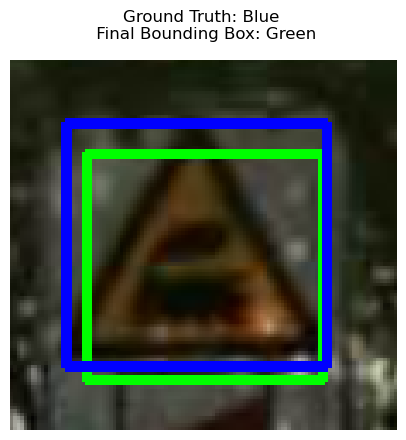

Done processing image 106...
IoU for 047_0005_j.png: 0.7146
Dice Coefficient for 047_0005_j.png: 0.8335


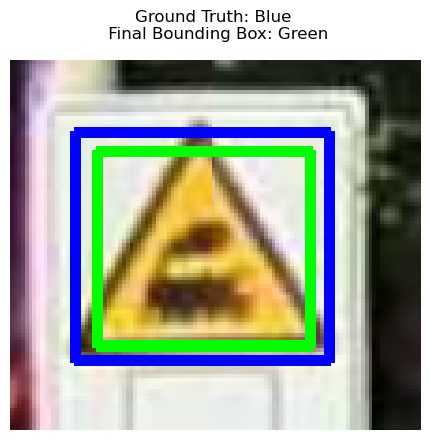

In [12]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.exposure import is_low_contrast

def load_images(folder):
    """
    Loading images from a folder and print warnings if image is not valid
    
    Arguments:
    ---------
    folder: Name of input folder
    
    Returns:
    --------
    images: A list of valid images
    filenames: A list of filenames of the valid images
    """
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv.imread(img_path)
        if img is not None:
            images.append(img)
            filenames.append(filename)
        else:
            print(f"Warning: Skipping file {img_path}, not a valid image.")
    return images, filenames


def denoise(img, kernel_size=3):
    """
    Perform image denoising with median blurring.
    
    Arguments:
    ---------
    img: BGR image (uint8)
    kernel_size: Size of kernel (default: 3)
    
    Returns:
    --------
    img: Blurred BGR image (uint8)
    """
    return cv.medianBlur(img, kernel_size)


def resize(img, max_width=200):
    """
    Perform resizing if and only if the image width is larger than the threshold.
    
    Arguments:
    ---------
    img: BGR image (uint8)
    max_width: Maximum width threshold (default: 200)
    
    Returns:
    --------
    img: Resized image (if image width <= threshold, then return original image)
    f: Resize ratio (if image width <= threshold, then return 1)
    """
    original_width = img.shape[1]
    if original_width > max_width:
        f = max_width / original_width
        img = cv.resize(img, None, fx=f, fy=f, interpolation=cv.INTER_AREA)
        return img, f  
    return img, 1 


def hsv_thresholding(img):
    """
    Perform hsv thresholding based on red, blue, yellow and black colors.
    Perform morphological operations on the mask.
    
    Arguments:
    ---------
    img: BGR image (uint8)
    
    Returns:
    --------
    cnts: A list of contours found on the refined color mask.
    """
    img_copy = img.copy()
    img_hsv = cv.cvtColor(img_copy, cv.COLOR_BGR2HSV)
    
    red_low_1 = (0, 40, 30)
    red_low_2 = (160, 40, 30)
    red_high_1 = (35, 255, 255)
    red_high_2 = (200, 255, 255)
    
    blue_low = (90, 40, 40)
    blue_high = (160, 255, 210)
    
    yellow_low = (25, 50, 70)
    yellow_high = (30, 255, 210)
    
    black_low = (0, 0, 0)
    black_high = (120, 255, 5)

    mask_red_1 = cv.inRange(img_hsv, red_low_1, red_high_1)
    mask_red_2 = cv.inRange(img_hsv, red_low_2, red_high_2)
    mask_blue = cv.inRange(img_hsv, blue_low, blue_high)
    mask_yellow = cv.inRange(img_hsv, yellow_low, yellow_high)
    mask_black = cv.inRange(img_hsv, black_low, black_high)
    
    masks = mask_red_1 | mask_red_2 | mask_blue | mask_yellow | mask_black
    
    kernel = np.ones((5, 5), np.uint8)
    closed_masks = cv.morphologyEx(masks, cv.MORPH_CLOSE, kernel)
    opened_masks = cv.morphologyEx(masks, cv.MORPH_OPEN, kernel)
    
    cnts, _ = cv.findContours(opened_masks, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    
    return cnts


def contrast_enhance(img):
    """
    Perform contrast enhancement through histogram equalization on luminance channel of the image.
    
    Arguments:
    ---------
    img: BGR image (uint8)

    Returns:
    --------
    img: BGR image (uint8) with enhanced contrast
    """
    img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    L, a, b = cv.split(img_lab)
    L = cv.equalizeHist(L)
    img_lab_merge = cv.merge((L, a, b))
    return cv.cvtColor(img_lab_merge, cv.COLOR_Lab2BGR)


def auto_canny(img, sigma=0.6):
    """
    Perform auto canny edge detection based on the median pixels intensity of the image.
    
    Arguments:
    ---------
    img: Grayscale image
    sigma: Standard deviation factor used to calculate the lower and upper thresholds. 
           A higher value of sigma results in more edges being detected (lower thresholds),
           A lower value makes the edge detection stricter (higher thresholds).
           (default: 0.6)

    Returns:
    --------
    img: Edged detected image 
    """
    m = np.median(img)
    lower = (1 - sigma) * m
    upper = (1 + sigma) * m
    return cv.Canny(img, lower, upper)


def shape_preprocessing(img):
    """
    Convert BGR image to grayscale image.
    Perform Gaussian blurring.
    Perform Canny edge detection.
    
    Arguments:
    ---------
    img: BGR image (uint8)
           
    Calls:
    --------
    auto_canny(): Perform Canny edge detection

    Returns:
    --------
    img: Preprocessed image ready for shape detection 
    """
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5, 5), 1)
    edges = auto_canny(blur)
    return edges


def shape_detection(edges):
    """
    Perform detection on circles, triangles, squares, rectangles and octagons.
    Methods: Hough Circle Transform + Douglas Peucker Algorithm
    
    Arguments:
    ---------
    img: Edge detected image 
    
    Returns:
    --------
    cnts: A list of contours of detected shapes
    """
    cnts = []
    circles = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, dp=1, minDist=200, param1=200,
                              param2=50, minRadius=10, maxRadius=100)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            circle_contour = np.array([[x + r*np.cos(theta), y + r*np.sin(theta)] for theta in np.linspace(0, 2*np.pi, 100)], dtype=np.int32)
            circle_contour = circle_contour.reshape((-1, 1, 2))  # Format it as a contour
            cnts.append(circle_contour)
    
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  
    for cnt in contours:
        area = cv.contourArea(cnt)
        if area > 400:
            perimeter = cv.arcLength(cnt, True)
            approx = cv.approxPolyDP(cnt, 0.02 * perimeter, True)
            objCorner = len(approx)
            x, y, w, h = cv.boundingRect(approx)
            if objCorner in [3,4,8]:
                cnts.append(cnt)
                
    return cnts
    

def output_integration_filter(img, cnts_c, cnts_s):
    """
    Integrate two lists of contours and perform filtering based on the drawn bounding box size.
    Condition 1: If drawn bouding box is less than 1/9 of image size, the contour will be removed.
    Condition 2: Perform further filtering by only remain the smallest contour that passes through Condition 1.
    Draw green bounding box for the remaining one that passes through Condition 1 and Condition 2.
    
    Arguments:
    ---------
    img: BGR image (uint8)
    cnts_c: A list of contours (suggested context: From color detection)
    cnts_s: A list of contours (suggested context: From shape detection)
           
    Returns:
    --------
    img: BGR image with bounding box drawn (zero filtered bounding box => original image)
    final_box: A dictionary containing the coordinates of the bounding box (no bounding box => empty dictionary)
    """
    cnts = list(cnts_c) + list(cnts_s)
    img_area = img.shape[0] * img.shape[1]
    smallest_box_found = img_area
    min_box_area = img_area / 9
    found = False
    
    final_box = None  # Ensure final_box is initialized
    
    for cnt in cnts:
        x, y, w, h = cv.boundingRect(cnt)
        box_area = w * h

        if min_box_area <= box_area <= smallest_box_found:
            final_box = {
                'x_start': x,
                'y_start': y,
                'x_end': x + w,
                'y_end': y + h
            }
            smallest_box_found = box_area
            found = True

    if found and final_box:   
        cv.rectangle(img, (final_box['x_start'], final_box['y_start']), 
                     (final_box['x_end'], final_box['y_end']), (0, 255, 0), 2)

    return img, final_box if final_box else {}

def load_ground_truth(file_path):
    """
    Load ground truth bounding boxes from a file.
    
    Arguments:
    ---------
    file_path: Path to the ground truth file.
    
    Returns:
    --------
    ground_truth: Dictionary with ground truth bounding boxes.
    """
    ground_truth_boxes = {}

    with open(file_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split(';')
            filename = parts[0]
            width = int(parts[1])
            height = int(parts[2])
            x_start = int(parts[3])
            y_start = int(parts[4])
            x_end = int(parts[5])
            y_end = int(parts[6])
            label = int(parts[7])
            
            # Add to the dictionary
            ground_truth_boxes[filename] = {
                'x_start': x_start,
                'y_start': y_start,
                'x_end': x_end,
                'y_end': y_end,
                'label': label
            }
    return ground_truth_boxes

def adjust_gt_box(gt_box, resize_ratio):
    """
    Adjust the ground truth bounding box coordinates based on the resize ratio.
    
    Arguments:
    ---------
    gt_box: Dictionary containing the ground truth bounding box with keys ('x_start', 'y_start', 'x_end', 'y_end', 'label').
    resize_ratio: Ratio by which the image was resized.
    
    Returns:
    --------
    adjusted_box: Dictionary containing the adjusted bounding box coordinates.
    """
    adjusted_box = {
        'x_start': int(gt_box['x_start'] * resize_ratio),
        'y_start': int(gt_box['y_start'] * resize_ratio),
        'x_end': int(gt_box['x_end'] * resize_ratio),
        'y_end': int(gt_box['y_end'] * resize_ratio),
        'label': gt_box['label']
    }
    return adjusted_box


def computeIOU(boxA, boxB):
    """
    Compute Intersection over Union (IoU) between two bounding boxes.
    
    Arguments:
    ---------
    boxA: Dictionary containing coordinates of the first bounding box with keys ('x_start', 'y_start', 'x_end', 'y_end').
    boxB: Dictionary containing coordinates of the second bounding box with keys ('x_start', 'y_start', 'x_end', 'y_end').
    
    Returns:
    --------
    iou: Intersection over Union value (float). Returns 0.0 if the boxes do not overlap or if union area is zero.
    """
    required_keys = ['x_start', 'y_start', 'x_end', 'y_end']
    
    # Check if both boxes contain the required keys
    if not all(key in boxA for key in required_keys) or not all(key in boxB for key in required_keys):
        print(f"Error: Missing keys in boxA or boxB.")
        return 0.0
    
    x_start = max(boxA['x_start'], boxB['x_start'])
    y_start = max(boxA['y_start'], boxB['y_start'])
    x_end = min(boxA['x_end'], boxB['x_end'])
    y_end = min(boxA['y_end'], boxB['y_end'])
    
    interWidth = max(0, x_end - x_start)
    interHeight = max(0, y_end - y_start)
    interArea = interWidth * interHeight

    areaA = (boxA['x_end'] - boxA['x_start']) * (boxA['y_end'] - boxA['y_start'])
    areaB = (boxB['x_end'] - boxB['x_start']) * (boxB['y_end'] - boxB['y_start'])

    unionArea = areaA + areaB - interArea
    if unionArea == 0:
        return 0.0

    return interArea / unionArea

def dice_coefficients(boxA, boxB):
    required_keys = ['x_start', 'y_start', 'x_end', 'y_end']
    
    # Check if both boxes contain the required keys
    if not all(key in boxA for key in required_keys) or not all(key in boxB for key in required_keys):
        print(f"Error: Missing keys in boxA or boxB.")
        return 0.0
    
    x_start = max(boxA['x_start'], boxB['x_start'])
    y_start = max(boxA['y_start'], boxB['y_start'])
    x_end = min(boxA['x_end'], boxB['x_end'])
    y_end = min(boxA['y_end'], boxB['y_end'])
    
    interWidth = max(0, x_end - x_start)
    interHeight = max(0, y_end - y_start)
    interArea = interWidth * interHeight

    areaA = (boxA['x_end'] - boxA['x_start']) * (boxA['y_end'] - boxA['y_start'])
    areaB = (boxB['x_end'] - boxB['x_start']) * (boxB['y_end'] - boxB['y_start'])

    dice = (2 * interArea) / float(areaA + areaB)

    if dice == 0.0:
        return 0.0
    
    return dice

    
# Initialize lists to store IoU scores
iou_scores = []
iou_zero_scores = []
dcs = []

def main():
    
    # Load images and filenames from folder
    images, filenames = load_images('test')

    output_folder = 'result'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load ground truth bounding boxes from file
    ground_truth_file = 'TsignRecgTest1994Annotation.txt'
    ground_truth_boxes = load_ground_truth(ground_truth_file)
    
    # Process each image
    for i,(img, filename) in enumerate(zip(images, filenames)):
        
        img_copy = img.copy()
        
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        if is_low_contrast(gray):
                img = contrast_enhance(img)

        denoised = denoise(img)
        resized, resize_ratio = resize(denoised)

        color_based_cnts = hsv_thresholding(resized)

        edges = shape_preprocessing(resized)
        shape_based_cnts = shape_detection(edges)

        only_resized, _ = resize(img_copy) #to draw bounding box on a resized image without blurring
        bounded, final_box = output_integration_filter(only_resized,color_based_cnts,shape_based_cnts)

        print(f"Done processing image {i+1}...")

        # Retrieve ground truth bounding box for the image using the actual filename
        if filename in ground_truth_boxes:
            gt_box = ground_truth_boxes[filename]
            
            if resize_ratio != 1:
                gt_box = adjust_gt_box(gt_box, resize_ratio)

            # Draw the ground truth bounding box on the image
            cv.rectangle(bounded, 
                         (gt_box['x_start'], gt_box['y_start']), 
                         (gt_box['x_end'], gt_box['y_end']), 
                         (255, 0, 0), 2)  # Blue color for ground truth
                
            iou = computeIOU(gt_box, final_box)
            dice = dice_coefficients(gt_box,final_box)
            print(f"IoU for {filename}: {iou:.4f}")
            print(f"Dice Coefficient for {filename}: {dice:.4f}")
        
            iou_scores.append(iou)
            dcs.append(dice)
            if iou == 0:
                iou_zero_scores.append(filename)
        else:
            print(f"No ground truth available for {filename}")

        output_path = os.path.join(output_folder, filename)
        cv.imwrite(output_path, bounded)

        #display the image with detected traffic sign
        plt.text(0.5, 1.05, 'Ground Truth: Blue \n Final Bounding Box: Green',
             horizontalalignment='center', verticalalignment='bottom', fontsize=12, transform=plt.gca().transAxes)
        plt.imshow(cv.cvtColor(bounded, cv.COLOR_BGR2RGB))  
        plt.axis('off')  
        plt.show()

if __name__ == "__main__":
    main()

# Statistical Analysis of IOU Score

In [2]:
# Perform statistical analysis
iou_scores = np.array(iou_scores)
mean_iou = np.mean(iou_scores)
median_iou = np.median(iou_scores)
zero_iou_count = len(iou_zero_scores)

print(f"Mean IoU: {mean_iou:.4f}")
print(f"Median IoU: {median_iou:.4f}")
print(f"Count of zero IoUs: {zero_iou_count}")

Mean IoU: 0.8078
Median IoU: 0.8642
Count of zero IoUs: 1


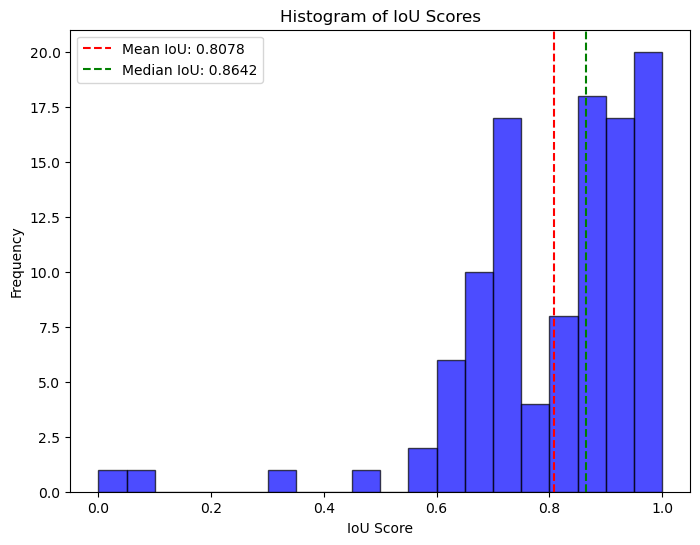

In [7]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(iou_scores, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of IoU Scores')
plt.xlabel('IoU Score')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(mean_iou, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean IoU: {mean_iou:.4f}')
plt.axvline(median_iou, color='green', linestyle='dashed', linewidth=1.5, label=f'Median IoU: {median_iou:.4f}')

# Add legend
plt.legend()

# Show plot
plt.show()